In [ ]:
# Execute the following in the terminal to install dependencies:
pip install -r requirements.txt

# Exercise 1: Implementing the Smith-Waterman algorithm

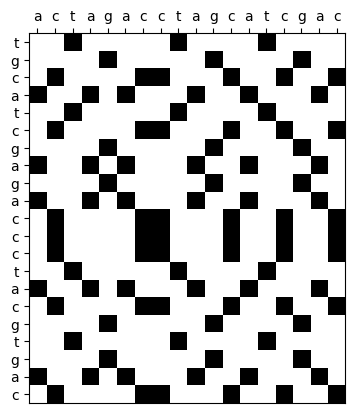

In [1]:
# Plot comparison matrix for visualization purposes
import numpy as np
import matplotlib.pyplot as plt

def make_diagram(seq1, seq2):
    data = np.zeros((len(seq1), len(seq2)))
    for i, base1 in enumerate(seq1):
        for j, base2 in enumerate(seq2):
            if base1 == base2:
                data[i, j] = 1
    plt.xticks(range(len(seq2)), labels=seq2)
    plt.yticks(range(len(seq1)), labels=seq1)
    plt.imshow(data, interpolation='nearest', cmap='binary')
    plt.gca().xaxis.tick_top()

make_diagram('tgcatcgagaccctacgtgac', 'actagacctagcatcgac')
plt.show()

In [29]:
# Smith-Waterman algorithm: Calculate optimal local alignment and score between two sequences
import numpy as np

def align(seq1, seq2, match=1, gap_penalty=1, mismatch_penalty=1):
    # Create scoring matrix and initialize with zeroes
    m, n = len(seq1), len(seq2)
    scoring_matrix = np.zeros((m + 1, n + 1))

    # Fill the scoring matrix using the Smith-Waterman equation
    max_score = 0    # Keeps track of maximum score in matrix
    max_pos = (0, 0)    # Position of the highest score in matrix using a tuple

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            # Calculate possible scores for a match, mismatch, and gap for this cell
            matching = scoring_matrix[i - 1, j - 1] + (match if seq1[i - 1] == seq2[j - 1] else -mismatch_penalty) # Add match score if bases match, else subtract mismatch penalty
            deletion = scoring_matrix[i - 1, j] - gap_penalty # Subtract gap penalty if we want a gap in sequence 1
            insertion = scoring_matrix[i, j - 1] - gap_penalty # Subtract gap penalty if we want a gap in sequence 2

            # Choose the highest score for this cell from four scenarios
            scoring_matrix[i, j] = max(0, matching, deletion, insertion) # 0 = No similarity at all between seq1 and seq2

            # Update maximum score in matrix and position of maximum score in matrix
            if scoring_matrix[i, j] >= max_score:
                max_score = scoring_matrix[i, j] # Update maximum score
                max_pos = (i, j) # Update maximum matrix position

    # Traceback from highest score using recursion to find the optimal local alignment
    def traceback(max_pos):
        i, j = max_pos   # Unpack tuple
        align1, align2 = '', '' # Initialize final aligned sequences
        
        while scoring_matrix[i, j] > 0:
            current_score = scoring_matrix[i, j] # Score of current cell
            diagonal_score = scoring_matrix[i - 1, j - 1] # Go diagonally up?
            up_score = scoring_matrix[i, j - 1] # Go up?
            left_score = scoring_matrix[i - 1, j] # Go left?

            # Check if the trace is at a match, mismatch, or gap in the matrix
            if current_score == diagonal_score + (match if seq1[i - 1] == seq2[j - 1] else -mismatch_penalty):
                align1 += seq1[i - 1] # Add base to aligned sequence 1
                align2 += seq2[j - 1] # Add base to aligned sequence 2
                i -= 1 # Move diagonally up
                j -= 1 
            elif current_score == up_score - gap_penalty:
                align1 += '-' # Add gap to aligned sequence 1
                align2 += seq2[j - 1] # Add base to aligned sequence 2
                j -= 1 # Move up
            elif current_score == left_score - gap_penalty:
                align1 += seq1[i - 1] # Add base to aligned sequence 1
                align2 += '-' # Add gap to aligned sequence 2
                i -= 1 # Move left

        return align1[::-1], align2[::-1] # Reverse slice to return alignments in correct order

    return traceback(max_pos), max_score, scoring_matrix # Return optimal local alignment, score, and scoring matrix

In [41]:
# Test the algorithm
alignment, score, matrix = align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac')
print(f"Optimal local alignment: {alignment}")
print(f"Alignment score: {score}")
print(f"Scoring matrix: \n{matrix}")

Optimal local alignment: ('agacccta-cgt-gac', 'aga-cctagcatcgac')
Alignment score: 8.0
Scoring matrix: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 2. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 3. 2. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 2. 4. 3. 2. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 3. 5. 4. 3. 2.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 2. 4. 6. 5. 4.]
 [0. 1. 0. 0. 1. 0. 2. 1. 0. 0. 1. 0. 0. 1. 1. 3. 5. 7. 6.]
 [0. 0. 0. 0. 0. 2. 1. 1. 0. 0. 0. 2. 1. 0. 0. 2. 4. 6. 6.]
 [0. 1. 0. 0. 1. 1. 3. 2. 1. 0. 1. 1. 1. 2. 1. 1. 3. 5. 5.]
 [0. 0. 2. 1. 0. 0. 2. 4. 3. 2. 1. 0. 2. 1. 1. 2. 2. 4. 6.]
 [0. 0. 1. 1. 0. 0. 1. 3. 5. 4. 3. 2. 1. 1. 0. 2. 1. 3. 5.]
 [0. 0. 1. 0. 0. 0. 0. 2. 4. 4. 3. 2. 3. 2. 1. 1. 1. 2. 4.]
 [0. 0. 0. 2. 1. 0. 0. 1. 3. 5. 4. 3. 2. 2. 3. 2. 1. 1. 

In [42]:
alignment, score, matrix = align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', gap_penalty=2)
print(f"Optimal local alignment: {alignment}")
print(f"Alignment score: {score}")
print(f"Scoring matrix: \n{matrix}")

Optimal local alignment: ('gcatcga', 'gcatcga')
Alignment score: 7.0
Scoring matrix: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 2. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 3. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 4. 2. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 2. 5. 3. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 3. 6. 4. 2.]
 [0. 1. 0. 0. 1. 0. 2. 0. 0. 0. 1. 0. 0. 1. 0. 1. 4. 7. 5.]
 [0. 0. 0. 0. 0. 2. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 2. 5. 6.]
 [0. 1. 0. 0. 1. 0. 3. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 3. 4.]
 [0. 0. 2. 0. 0. 0. 1. 4. 2. 0. 0. 0. 1. 0. 0. 1. 0. 1. 4.]
 [0. 0. 1. 1. 0. 0. 0. 2. 5. 3. 1. 0. 1. 0. 0. 1. 0. 0. 2.]
 [0. 0. 1. 0. 0. 0. 0. 1. 3. 4. 2. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 2. 0. 0. 0. 0. 1. 4. 3. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 

In [45]:
alignment, score, matrix = align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', match=3, gap_penalty=1, mismatch_penalty=2)
print(f"Optimal local alignment: {alignment}")
print(f"Alignment score: {score}")
print(f"Scoring matrix: \n{matrix}")

Optimal local alignment: ('atcgagacccta-cgt-gac', 'a-ctaga-cctagcatcgac')
Alignment score: 34.0
Scoring matrix: 
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  3.  2.  1.  0.  0.  0.  3.  2.  1.  0.  0.  3.  2.  1.  0.
   0.]
 [ 0.  0.  0.  2.  1.  5.  4.  3.  2.  2.  1.  5.  4.  3.  2.  1.  5.  4.
   3.]
 [ 0.  0.  3.  2.  1.  4.  3.  7.  6.  5.  4.  4.  8.  7.  6.  5.  4.  3.
   7.]
 [ 0.  3.  2.  1.  5.  4.  7.  6.  5.  4.  8.  7.  7. 11. 10.  9.  8.  7.
   6.]
 [ 0.  2.  1.  5.  4.  3.  6.  5.  4.  8.  7.  6.  6. 10. 14. 13. 12. 11.
  10.]
 [ 0.  1.  5.  4.  3.  2.  5.  9.  8.  7.  6.  5.  9.  9. 13. 17. 16. 15.
  14.]
 [ 0.  0.  4.  3.  2.  6.  5.  8.  7.  6.  5.  9.  8.  8. 12. 16. 20. 19.
  18.]
 [ 0.  3.  3.  2.  6.  5.  9.  8.  7.  6.  9.  8.  7. 11. 11. 15. 19. 23.
  22.]
 [ 0.  2.  2.  1.  5.  9.  8.  7.  6.  5.  8. 12. 11. 10. 10. 14. 18. 22.
  21.]
 [ 0.  3.  2.  1.  4.  8. 12. 11. 10.  9.  8. 11. 10. 14. 13. 13. 17. 21.
  2

In [46]:
alignment, score, matrix = align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', match=2, gap_penalty=2, mismatch_penalty=2)
print(f"Optimal local alignment: {alignment}")
print(f"Alignment score: {score}")
print(f"Scoring matrix: \n{matrix}")

Optimal local alignment: ('agacccta-cgt-gac', 'aga-cctagcatcgac')
Alignment score: 16.0
Scoring matrix: 
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  2.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  2.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  2.  0.
   0.]
 [ 0.  0.  2.  0.  0.  0.  0.  2.  2.  0.  0.  0.  4.  2.  0.  2.  0.  0.
   2.]
 [ 0.  2.  0.  0.  2.  0.  2.  0.  0.  0.  2.  0.  2.  6.  4.  2.  0.  2.
   0.]
 [ 0.  0.  0.  2.  0.  0.  0.  0.  0.  2.  0.  0.  0.  4.  8.  6.  4.  2.
   0.]
 [ 0.  0.  2.  0.  0.  0.  0.  2.  2.  0.  0.  0.  2.  2.  6. 10.  8.  6.
   4.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  2.  0.  0.  4.  8. 12. 10.
   8.]
 [ 0.  2.  0.  0.  2.  0.  4.  2.  0.  0.  2.  0.  0.  2.  2.  6. 10. 14.
  12.]
 [ 0.  0.  0.  0.  0.  4.  2.  2.  0.  0.  0.  4.  2.  0.  0.  4.  8. 12.
  12.]
 [ 0.  2.  0.  0.  2.  2.  6.  4.  2.  0.  2.  2.  2.  4.  2.  2.  6. 10.
  10.]
 [ 0

In [47]:
alignment, score, matrix = align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', match=1, gap_penalty=1, mismatch_penalty=0.5)
print(f"Optimal local alignment: {alignment}")
print(f"Alignment score: {score}")
print(f"Scoring matrix: \n{matrix}")

Optimal local alignment: ('cgagacccta-cgt-gac', 'ctaga-cctagcatcgac')
Alignment score: 9.0
Scoring matrix: 
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.
  0. ]
 [0.  0.  0.  0.  0.5 1.  0.  0.  0.  0.  0.5 1.  0.  0.  0.  0.5 1.  0.
  0. ]
 [0.  0.  1.  0.  0.  0.  0.5 1.  1.  0.  0.  0.  2.  1.  0.  1.  0.  0.5
  1. ]
 [0.  1.  0.  0.5 1.  0.  1.  0.  0.5 0.5 1.  0.  1.  3.  2.  1.  0.5 1.
  0. ]
 [0.  0.  0.5 1.  0.  0.5 0.  0.5 0.  1.5 0.5 0.5 0.  2.  4.  3.  2.  1.
  0.5]
 [0.  0.  1.  0.  0.5 0.  0.  1.  1.5 0.5 1.  0.  1.5 1.  3.  5.  4.  3.
  2. ]
 [0.  0.  0.  0.5 0.  1.5 0.5 0.  0.5 1.  0.  2.  1.  1.  2.  4.  6.  5.
  4. ]
 [0.  1.  0.  0.  1.5 0.5 2.5 1.5 0.5 0.  2.  1.  1.5 2.  1.  3.  5.  7.
  6. ]
 [0.  0.  0.5 0.  0.5 2.5 1.5 2.  1.  0.  1.  3.  2.  1.  1.5 2.  4.  6.
  6.5]
 [0.  1.  0.  0.  1.  1.5 3.5 2.5 1.5 0.5 1.  2.  2.5 3.  2.  1.  3.  5.
  5.5]
 [0.  0.  2